<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) 

Project 3 is all about modelling exploring this data and modeling interesting relationships with regression. 


---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

** Feel free to include any other datasets from the San Francisco data if you think there is relevance or if it could be useful for your analysis.**


**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


In [2]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, Binarizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor   

# Notebook Options:
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
display(HTML("<style>.container { width:100% !important; }</style>"))
InteractiveShell.ast_node_interactivity = "all"

# Pandas Options: 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 300)

# Point to Working Directory:
os.chdir('C://Users//Brian//Desktop//Project_3_github/project3')


In [3]:
df = pd.read_csv('assessor_value_cleaned.csv')

In [4]:
%store df

Stored 'df' (DataFrame)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use the San Francisco assessor dataset and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.(This is totally upto you)
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [4]:
df.shape

(754147, 17)

In [5]:
# Column SUmmary:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754147 entries, 0 to 754146
Data columns (total 17 columns):
baths             754147 non-null int64
beds              754147 non-null int64
lot_depth         754147 non-null float64
basement_area     754147 non-null float64
front_ft          754147 non-null float64
owner_pct         754147 non-null float64
rooms             754147 non-null int64
property_class    754147 non-null object
neighborhood      754147 non-null object
tax_rate          754147 non-null float64
volume            754147 non-null int64
sqft              754147 non-null int64
stories           754147 non-null int64
year_recorded     754147 non-null int64
year_built        754147 non-null int64
zone              754147 non-null object
value             754147 non-null float64
dtypes: float64(6), int64(8), object(3)
memory usage: 97.8+ MB


In [6]:
# No Null Values:
df.isnull().sum().sort_values(ascending=False)

value             0
property_class    0
beds              0
lot_depth         0
basement_area     0
front_ft          0
owner_pct         0
rooms             0
neighborhood      0
zone              0
tax_rate          0
volume            0
sqft              0
stories           0
year_recorded     0
year_built        0
baths             0
dtype: int64

### Correlated Variables with 'Value'

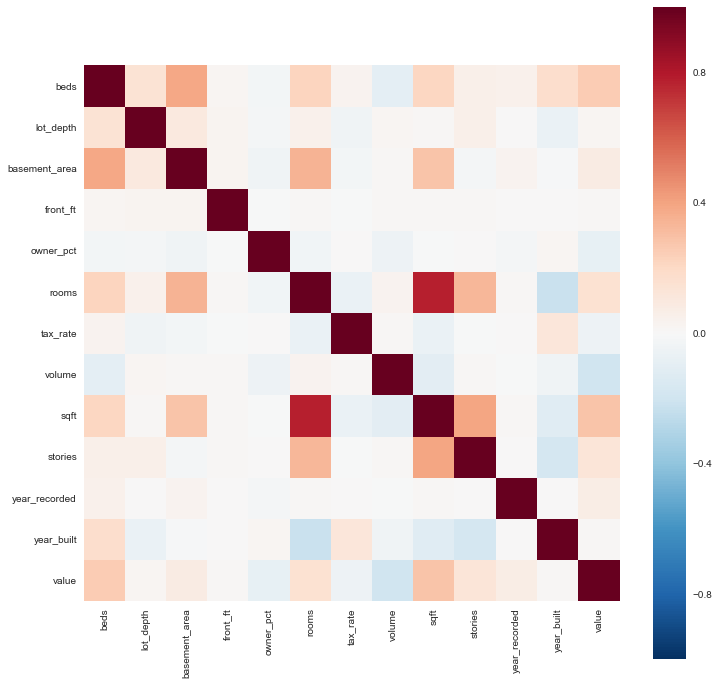

In [8]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True);

Rooms and square feet are strongly correlated, which makes intuitive sense. It doesnt look like there are obviously strong correlations in the data so far. 

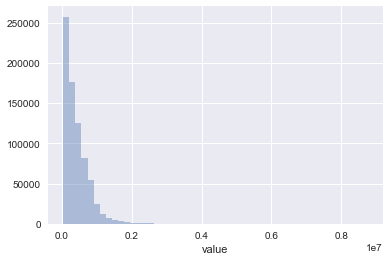

In [9]:
sns.distplot(df.value,  kde=False)

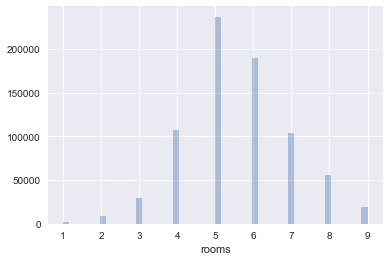

In [10]:
sns.distplot(df.rooms,  kde=False)

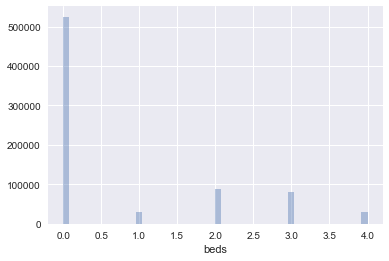

In [11]:
sns.distplot(df.beds,  kde=False)

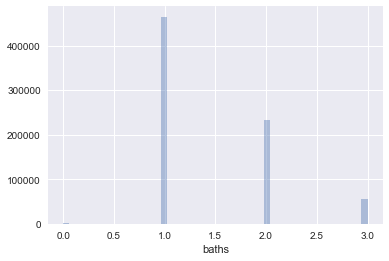

In [12]:
sns.distplot(df.baths,  kde=False)

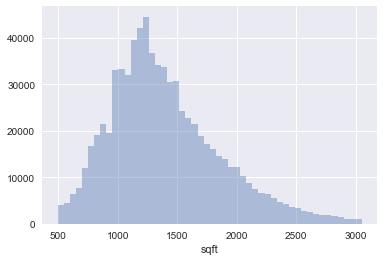

In [13]:
sns.distplot(df.sqft,  kde=False)

So the beds distribution looks way off. There is an extreme outlier for 0 bedroom units, which doesnt gel with me as I dont think there are that many studio units in the city. 
I didn't have a chance to look into this further. Baths are distributed better, with total rooms looking the best (in terms of rooms). 
Even with the odd bedroom distribution skewed, the sqft distro looks better. This looks to be the best single indicator of overall value. 

## Categorical Data

In [16]:
property_class = df['property_class'].unique()
hood = df['neighborhood'].unique()
zone = df['zone'].unique()

In [17]:
property_class.sort()
property_class

array(['D', 'DBM', 'LZ', 'TH', 'Z', 'ZBM'], dtype=object)

In [18]:
hood.sort()
hood

array(['01A', '01B', '01C', '01D', '01E', '01F', '01G', '02A', '02B',
       '02C', '02D', '02E', '02F', '02G', '03A', '03B', '03C', '03D',
       '03E', '03F', '03G', '03H', '03J', '047', '04A', '04B', '04C',
       '04D', '04E', '04F', '04G', '04H', '04J', '04K', '04M', '04N',
       '04P', '04R', '04S', '04T', '05A', '05B', '05C', '05D', '05E',
       '05F', '05G', '05H', '05J', '05K', '05M', '06A', '06B', '06C',
       '06D', '06E', '06F', '07A', '07B', '07C', '07D', '08A', '08B',
       '08C', '08D', '08E', '08F', '08G', '08H', '08I', '09A', '09B',
       '09C', '09D', '09E', '09F', '09G', '09H', '10A', '10B', '10C',
       '10D', '10E', '10F', '10G', '10H', '10J', '10K'], dtype=object)

### Beds/Baths Crosstab:

In [20]:
pd.crosstab(df.beds, df.baths)

baths,0,1,2,3
beds,,,,
0,891,372523,127533,24094
1,80,28785,1823,70
2,158,44160,39952,3247
3,182,16371,47904,15963
4,48,2821,15024,12518


### Neighborhood & Value Boxplot

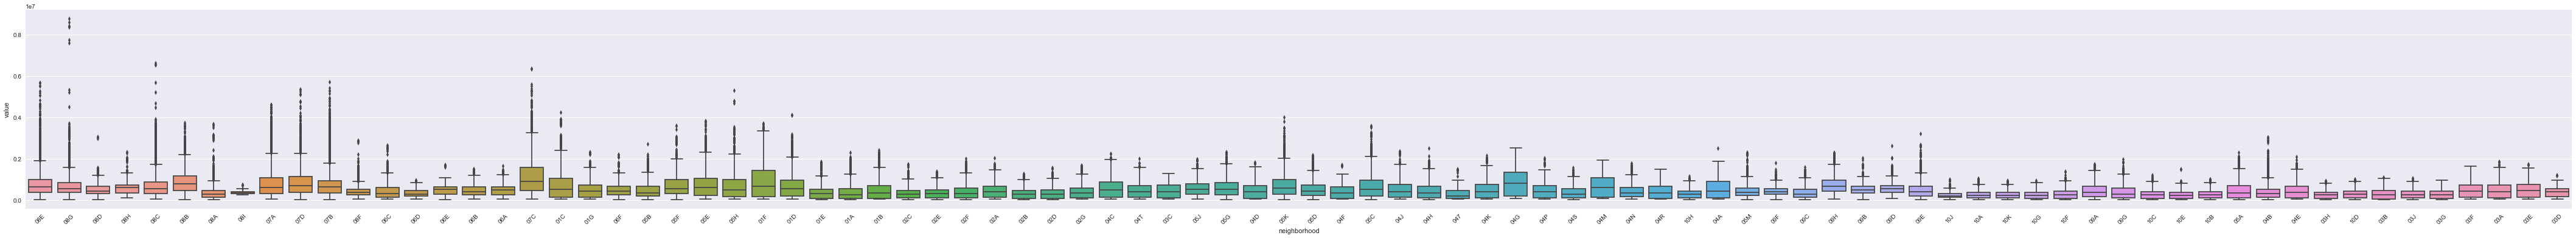

In [21]:
plt.figure(figsize = (75, 6))
sns.boxplot(x = 'neighborhood', y = 'value',  data = df)
xt = plt.xticks(rotation=45);

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

# 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


## 1) Encode Categorical Variables:

In [24]:
# Copy original df to X.. X will be design and target
X = df.copy()

# Instantiate Encoder:
le = LabelEncoder()

In [27]:
# Visual of 'Object' dtypes
X.head()

,baths,beds,lot_depth,basement_area,front_ft,owner_pct,rooms,property_class,neighborhood,tax_rate,volume,sqft,stories,year_recorded,year_built,zone,value
0,2,2,0.0,0.0,0.0,1.00000,5,Z,08E,1000.0,1,1419,0,2007,1907,RH3,1002840.0
1,2,2,0.0,0.0,0.0,1.00000,7,Z,08E,1000.0,1,1773,0,2007,1907,RH3,1433430.0
2,2,2,0.0,0.0,0.0,1.00000,5,Z,08E,1000.0,1,1242,0,2007,1995,C2,485599.0
3,1,0,0.0,0.0,0.0,0.33333,6,D,08E,1000.0,1,1820,1,2007,1927,RH3,120826.0
4,1,0,0.0,0.0,0.0,1.00000,4,D,08E,1000.0,1,1020,1,2007,1926,RH3,988380.0


In [26]:
# Visual of 'Object' dtypes
X.dtypes

baths               int64
beds                int64
lot_depth         float64
basement_area     float64
front_ft          float64
owner_pct         float64
rooms               int64
property_class     object
neighborhood       object
tax_rate          float64
volume              int64
sqft                int64
stories             int64
year_recorded       int64
year_built          int64
zone               object
value             float64
dtype: object

In [28]:
# Encode each categorical column:
X['property_class'] = le.fit_transform(X['property_class']) 
X['neighborhood'] = le.fit_transform(X['neighborhood']) 
X['zone'] = le.fit_transform(X['zone']) 

In [29]:
# Verify X Matrix Encoded:
X.head()
X.dtypes

,baths,beds,lot_depth,basement_area,front_ft,owner_pct,rooms,property_class,neighborhood,tax_rate,volume,sqft,stories,year_recorded,year_built,zone,value
0,2,2,0.0,0.0,0.0,1.00000,5,4,65,1000.0,1,1419,0,2007,1907,45,1002840.0
1,2,2,0.0,0.0,0.0,1.00000,7,4,65,1000.0,1,1773,0,2007,1907,45,1433430.0
2,2,2,0.0,0.0,0.0,1.00000,5,4,65,1000.0,1,1242,0,2007,1995,1,485599.0
3,1,0,0.0,0.0,0.0,0.33333,6,0,65,1000.0,1,1820,1,2007,1927,45,120826.0
4,1,0,0.0,0.0,0.0,1.00000,4,0,65,1000.0,1,1020,1,2007,1926,45,988380.0


baths               int64
beds                int64
lot_depth         float64
basement_area     float64
front_ft          float64
owner_pct         float64
rooms               int64
property_class      int64
neighborhood        int64
tax_rate          float64
volume              int64
sqft                int64
stories             int64
year_recorded       int64
year_built          int64
zone                int64
value             float64
dtype: object

## 2) Create Design/Target Variables

In [30]:
# Create Targets
y = X.value.values

# Create Design 
X = X.drop('value', axis=1)

print X.shape, y.shape

(754147, 16) (754147L,)


In [77]:
ss = StandardScaler()
Xn = ss.fit_transform(X)
yn = ss.fit_transform(y)

C:\Users\Brian\Anaconda3\envs\dsi\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Brian\Anaconda3\envs\dsi\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [78]:
yn.reshape(-1,1)

array([[ 1.62369528],
       [ 2.79414195],
       [ 0.21771047],
       ..., 
       [ 4.46688662],
       [ 0.00478534],
       [ 0.19222969]])

In [80]:
X.shape, y.shape, Xn.shape, yn.shape

((754147, 16), (754147L,), (754147L, 16L), (754147L,))

## 3) Build Models

### Linear Regression:

In [36]:
# Linear Regression:
lr = LinearRegression(n_jobs=6)
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=6, normalize=False)

In [37]:
# R2:
lr_score = lr.score(X,y)
lr_score

0.2000057600367493

This score seems low to me. It feels like you could make a pretty good estimate of house value given the data set. I would check out those 0 bedroom records as a next step.

### Train/Test Split Regression:

In [34]:
# Create Splits:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)

In [38]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=6, normalize=False)

In [39]:
lr_ttsplit_score = lr.score(X_test, y_test)
lr_ttsplit_score

0.20207668846271631

#### Predictions

In [40]:
yhat = lr.predict(X_test)

In [41]:
y_test.shape, yhat.shape

((150830L,), (150830L,))

In [ ]:
y_actual_samp = pd.DataFrame(y_test).sample(1000)
y_predicted_samp = pd.DataFrame(yhat).sample(1000)
sqft_samp = X.sqft.sample(1000)

In [1]:
grid = sns.JointGrid(y_predicted_samp.values, sqft_samp.values)
grid.plot_joint(plt.scatter, color='r', alpha=.6)
plt.title('True vs Predicted Values');

NameError: name 'sns' is not defined

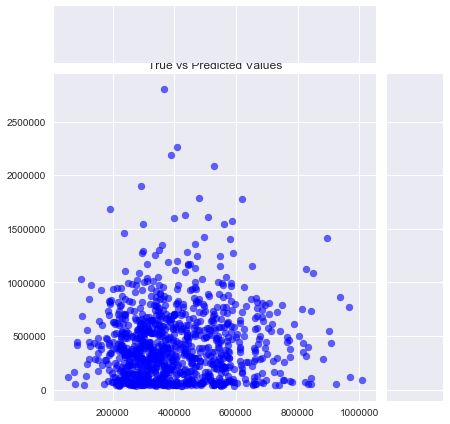

In [64]:
grid = sns.JointGrid(y_predicted_samp.values, y_actual_samp.values)
grid.plot_joint(plt.scatter, color='b', alpha=.6)
plt.title('True vs Predicted Values');

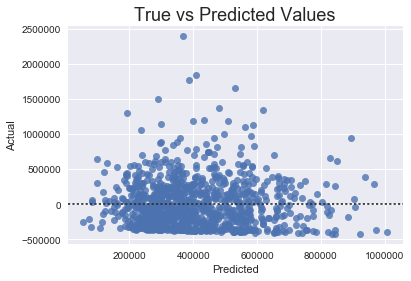

In [59]:
sns.residplot(y_predicted_samp.values, y_actual_samp.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('True vs Predicted Values', size=18);

### KFold Cross validation

In [ ]:
kf = KFold(n_splits=6)

scores=[]
for (train,test) in kf.split(X):
    X_train, X_test = X.iloc[train,:], X.iloc[test,:]
    y_train, y_test = y[train], y[test]
    lr.fit(X_train, y_train, )
    score = lr.score(X_test, y_test)
    scores.append(score)
    
KF_score = np.mean(scores)
print scores
print 'R2: ' + str(KF_score);

### Regression Comparison: R2 Plot

In [154]:
# Regression Comparison:
print lr_score, lr_ttsplit_score, KF_score

0.200005760037 0.199290788039 0.193634057863


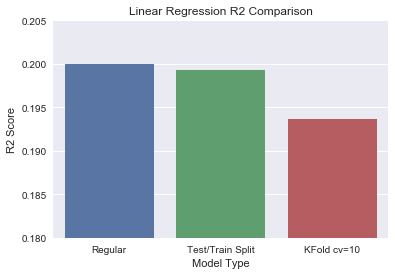

In [153]:
# Build Graph
ax = sns.barplot(x=['Regular','Test/Train Split','KFold cv=10'], y=[lr_score, lr_ttsplit_score, KF_score])
ax.set(ylim = [0.18,0.205], ylabel = 'R2 Score', xlabel = 'Model Type', title='Linear Regression R2 Comparison');

#### Mean Squared Error

In [73]:
from sklearn.metrics import mean_squared_error

In [76]:
mse = mean_squared_error(y_test,yhat)
print mse

106451888276.0


In [89]:
### Scaled:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn,yn, test_size = .2)

In [85]:
lr2 = LinearRegression()
lr2.fit(Xn_train,yn_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
yn_hat = lr2.predict(Xn_test)

In [88]:
mse_n = mean_squared_error(yn_test, yn_hat)
print mse_n

0.808773961686


My scaled mse looks a lot better than the non-scaled. Probably due to the widely varying scale of the data. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [ ]:
R2 is the amount of variance you can explain in the model, while MSE is the absolute squared deviation of points from the average. 
Negative R2 during cross validation means the model is worse than random guessing. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine Crime and Fire incidents datasets from the  San Francisco data. Build a Linear regression model to predict number of fire incidents. What are the most significant predictors?

### Evaluate the model with regularized regression.

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**


- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
- Report on which model is best after performing regularization, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.

In [15]:
from collections import Counter

In [128]:
ma = pd.read_csv('sf_crime_mini_adds.csv')
mc = pd.read_csv('sf_crime_mini_cats.csv')
cs = pd.read_csv('sf_crime_sample.csv')
csa = pd.read_csv('sf_crime_subset_adds.csv')
csc = pd.read_csv('sf_crime_subset_cats.csv')

#### ma - 'sf_crime_mini_adds'

In [ ]:
#ma.head(2)
#ma.shape

#### ma - 'sf_crime_mini_adds'

In [ ]:
#mc.head(2)
#mc.shape

In [ ]:
#csa.head(2)

In [ ]:
#csc.head(2)
#csc.shape

In [ ]:
#cs.head(2)
#cs.shape

# Crime

In [173]:
crime = pd.read_csv('Police_Department_Incidents_recent.csv')

In [174]:
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


In [175]:
# like with the crime data, restrict the dates:
crime['date_time'] = pd.to_datetime(crime['Date'], infer_datetime_format=True)
crime = crime[(crime.date_time >= min_date) & (crime.date_time <= max_date)]
crime = crime.drop('Date',axis=1)

#### Aggregated Daily Crime Counts

In [176]:
c = pd.DataFrame(crime.groupby(['date_time', 'Category']).size())
c = c.reset_index()
#c.head()
c = c.rename(columns={0:'Crimes', 'date_time': 'Date'})
c.head()

,Date,Category,Crimes
0,2016-01-01,ARSON,1
1,2016-01-01,ASSAULT,61
2,2016-01-01,BURGLARY,18
3,2016-01-01,DISORDERLY CONDUCT,1
4,2016-01-01,DRIVING UNDER THE INFLUENCE,4


In [188]:
crimes = pd.pivot_table(c, values='Crimes', columns='Category', index='Date', aggfunc=sum, fill_value=0).reset_index()

In [195]:
crimes.shape

(366, 40)

#### Wide Daily Crime with Dummy Variables

In [181]:
# Didnt work... too many rows...

#crime = crime[['date_time', 'Category']]
#crime = crime.rename(columns = {'date_time':'Date'})
#crimes = pd.get_dummies(crime)
#crimes.head(10)

# Fire

In [95]:
fire = pd.read_csv('Fire_Incidents.csv')

In [96]:
# I'm restricting the dates to be between 2005 and 2015:
import datetime
min_date = datetime.datetime(2016, 1, 1)
max_date = datetime.datetime(2016, 12, 31)

In [98]:
# like with the crime data, restrict the dates:
fire['date_time'] = pd.to_datetime(fire['Incident Date'], infer_datetime_format=True)
fire = fire[(fire.date_time >= min_date) & (fire.date_time <= max_date)]

## Daily Fires df:

In [159]:
d = pd.DataFrame(fire.groupby('date_time').size())
d = d.reset_index()
fires = d.rename(columns={0:'Fires', 'date_time': 'Date'})
#daily_fires.sort_values('Date', ascending=False)
fires.head()

,Date,Fires
0,2016-01-01,121
1,2016-01-02,89
2,2016-01-03,137
3,2016-01-04,78
4,2016-01-05,93


In [192]:
crime_fire = pd.merge(crimes, fires, how='inner', on='Date')

In [193]:
print crimes.shape, fires.shape, crime_fire.shape

(366, 40) (366, 2) (366, 41)


In [203]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

## Joined Crimes & Fires DataFrame:

In [194]:
crime_fire.head()

,Date,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,"SEX OFFENSES, FORCIBLE","SEX OFFENSES, NON FORCIBLE",STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS,Fires
0,2016-01-01,1,61,0,0,18,1,4,15,6,8,1,0,2,11,0,0,118,0,0,14,84,64,0,0,2,11,1,7,9,0,6,0,32,0,6,28,20,19,7,121
1,2016-01-02,4,27,0,0,21,2,1,10,1,1,1,0,3,9,0,0,116,0,0,10,42,46,0,0,3,7,1,8,3,0,3,0,15,0,4,24,16,14,3,89
2,2016-01-03,1,33,0,0,10,1,1,17,2,0,0,0,0,3,0,1,65,0,0,6,47,48,0,0,2,7,0,3,3,0,6,0,6,0,3,13,19,13,6,137
3,2016-01-04,3,26,0,0,16,2,1,6,0,0,0,0,3,8,0,1,89,1,0,15,50,46,0,0,0,10,0,7,1,0,2,0,22,0,4,17,15,17,4,78
4,2016-01-05,1,39,1,0,13,0,0,7,2,1,0,1,2,10,0,0,91,0,0,22,39,59,0,2,4,6,0,5,4,0,4,0,14,0,4,12,19,18,2,93


In [235]:
crime_fire['Date'] = pd.to_datetime(crime_fire['Date'])

In [244]:
crime_fire['Date'] = crime_fire['Date'].apply(lambda x: x.toordinal())

In [268]:
X = crime_fire.drop('Fires', axis=1)
y = crime_fire['Fires'].values

In [269]:
#Create Splits:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)

#### Linear Regression

In [270]:
# Linear Regression:
lr = LinearRegression(n_jobs=6)
lr.fit(X_train,y_train)
r2 = lr.score(X_train, y_train)
yhat = lr.predict(X_test)
mse = mean_squared_error(y_test, yhat)
print 'r2: ' + str(r2) 
print 'mse: ' + str(mse)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=6, normalize=False)

r2: 0.173353383951
mse: 135.302948186


#### Lasso

In [273]:
lasso = linear_model.LassoCV(cv=3, n_jobs=6)
lasso.fit(X_train,y_train)
print 'r2: ' + str(lasso.score(X_train,y_train))

LassoCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=6, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

r2: 0.0363939088985


#### Ridge

In [264]:
ridge = linear_model.RidgeCV(cv=3)
ridge.fit(X,y)
print 'r2: ' + str(ridge.score(X,y))

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=3, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

r2: 0.176044746493


The regression explains a small but decent chunk of the variance in the data at roughly .17 for Lasso and RidgeCV. It was actually higher than I though; I didnt think there would be that much support for using crime as a predictor for fires, except during riots and zombie apocolypses. 

# Parks Data Sets:

In [ ]:
#parks_info = pd.read_csv('Recreation___Park_Department_Park_Info_Dataset.csv')
#parks_info.head()

In [ ]:
#park_eval_2015 = pd.read_csv("Park_Evaluation_Scores_starting_Fiscal_Year_2015.csv")
#park_eval_2015.head()

In [ ]:
#park_scores_05_14 = pd.read_csv("Park_Scores_2005-2014.csv")
#park_scores_05_14.head()

In [ ]:
#street_names = pd.read_csv("Street_Names.csv")
#street_names.head()

In [ ]:
#sup_to_zip = pd.read_csv("Supervisor_District_to_ZIP_Code_Crosswalk.csv")
#sup_to_zip.head()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another analysis using the San Francisco Parks data to predict Park scores

---

1. Combining multiple sources of park data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.


I really didn't find any other data sets that would be a good regression. Perhaps I missed it, but it only looked like they had some neighborhood similarities between sets, in addition to supervisor and park manager IDs. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Use a model from any of the previous questions above of your choice and construct a regularized regression model . Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


In [278]:
from sklearn.model_selection import GridSearchCV

In [274]:
param_grid = [
    {'alpha' : [.0001, .001, .01, .1, 1, 10, 50, 100, 200, 500, 1000, 3000]}
]

In [282]:
model = linear_model.Lasso()
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, n_jobs=6)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=6,
       param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500, 1000, 3000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [283]:
print gs.best_score_
print gs.best_estimator_.alpha

-0.0138205396008
50


R2 went down.. into negative territory actually. It is using a different alpha of 50, which differs from the default of 1. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

NA

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco Crime data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

NA

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
 
- How would you measure the success of such a program?
  
- Rephrase this question to be unbiased:
    ** Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree? ** 
   


Selection bias. Free stuff does weird things to people. Like the near riots at Warriors games for the tshirts shot out of the air cannons. 
The friend aspect doesnt help with the bias. This behavior could disappear if they were on there on (or for others on their own. )

Long term user growth in general. Users who stuck around after the free trail would be a success.

Rephrased: How do you feel about current weapon laws?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data from the following website: 
http://assets.datacamp.com/blog_assets/chol.txt'


- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?

In [290]:
health = pd.read_csv('health.csv')

In [ ]:
# Health Summary:
health.describe()

In [293]:
health.SMOKE.unique()

array(['nonsmo', 'sigare', 'pipe'], dtype=object)

In [294]:
health.MORT.unique()

array(['alive', 'dead'], dtype=object)

In [296]:
smokers = health[health.SMOKE != 'nonsmo']
non = health[health.SMOKE ==  'nonsmo']

In [297]:
import scipy.stats as stats

#### Correlation Matrix

,AGE,HEIGHT,WEIGHT,CHOL
AGE,1.000000,-0.274894,0.053034,0.454691
HEIGHT,-0.274894,1.000000,0.491970,-0.287539
WEIGHT,0.053034,0.491970,1.000000,-0.034337
CHOL,0.454691,-0.287539,-0.034337,1.000000


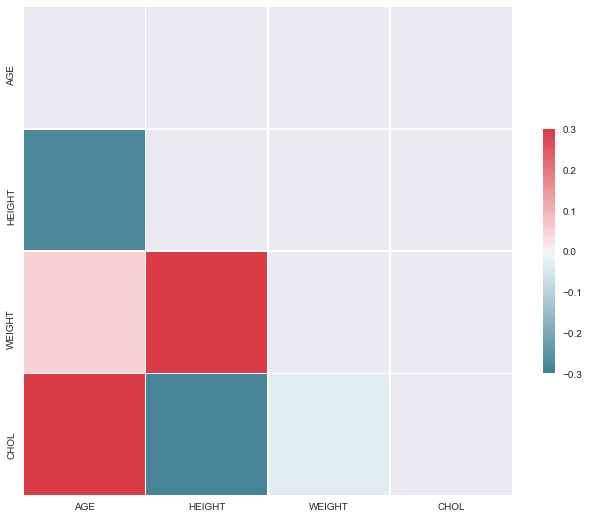

In [323]:
corr = health.corr()
corr
f, ax = plt.subplots(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,          linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
#g = sns.FacetGrid(health, row="AGE", col="WEIGHT", margin_titles=True)
#bins = np.linspace(0, 60, 13)
#g.map(plt.hist, "CHOL", color="steelblue", bins=bins, lw=0)
#plt.show()

In [299]:
Counter(non.MORT)
(pd.Series(range))

Counter({'alive': 45, 'dead': 4})

In [306]:
non_mort = np.concatenate((np.zeros(45), np.ones(4)))

In [301]:
Counter(smokers.MORT)

Counter({'alive': 131, 'dead': 20})

In [305]:
smoker_mort = np.concatenate((np.zeros(131), np.ones(20)))

In [308]:
stats.ttest_ind(non_mort, smoker_mort)

Ttest_indResult(statistic=-0.94854180220332329, pvalue=0.34400997514429488)

A large p-value (over .05) suggests weak evidence against the null hypoth. So while you may think smokers/non have different life spans, this test suggests otherwise. 

In [311]:
our_weight = health['WEIGHT'].mean()
our_weight

75.885

In [315]:
#stats.ttest_1samp(our_weight, 85)
stats.ttest_1samp(health['WEIGHT'], 85)

Ttest_1sampResult(statistic=-12.344821194685455, pvalue=2.2901936138582111e-26)

Small p-value means we can reject the null. Our data is significantly different than 85. 